In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. 
Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [8]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
print(gdp_df.head())
print(gdp_df.tail())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN
     Country or Area  Year        Value  Value Footnotes
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?
There are 4 columns with types float(2), int(1), object(1), with 7175 rows

In [10]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB
None


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [11]:
gdp_df = gdp_df.drop(['Value Footnotes'], axis=1)
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
print(gdp_df.head())


       Country  Year  GDP_Per_Capita
0  Afghanistan  2020     1970.560169
1  Afghanistan  2019     2065.036235
2  Afghanistan  2018     2033.804389
3  Afghanistan  2017     2058.400221
4  Afghanistan  2016     2057.067978


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [12]:
#show min and max years to get range of years
print(gdp_df["Year"].min())
print(gdp_df["Year"].max())
year_diff = (gdp_df["Year"].max() - gdp_df["Year"].min()) + 1
print(year_diff)

# the data contains a range of 30 years

year_count = gdp_df.groupby('Country')['Year'].count()
year_count = year_count.sort_values(ascending=False)
#print(year_count)

value_count = gdp_df["Country"].value_counts()
#print(value_count)

year_count.info()

len(year_count[year_count==year_diff])

# there are 205 countries with data for all years



1990
2020
31
<class 'pandas.core.series.Series'>
Index: 242 entries, Least developed countries: UN classification to Djibouti
Series name: Year
Non-Null Count  Dtype
--------------  -----
242 non-null    int64
dtypes: int64(1)
memory usage: 3.8+ KB


205

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

                         Country  Year  GDP_Per_Capita
0                    Afghanistan  2020     1970.560169
19   Africa Eastern and Southern  2020     3491.978104
50    Africa Western and Central  2020     4021.293919
81                       Albania  2020    13253.733337
112                      Algeria  2020    10735.382539


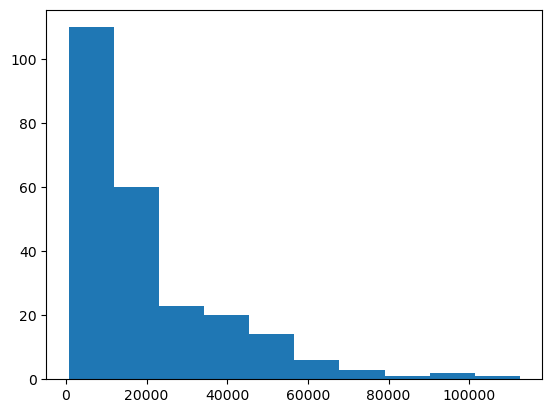

In [13]:
gdp_2020 = gdp_df.loc[gdp_df['Year'] == 2020]
print(gdp_2020.head())


#matplotlib histogram
plt.hist(gdp_2020['GDP_Per_Capita'])
plt.show()




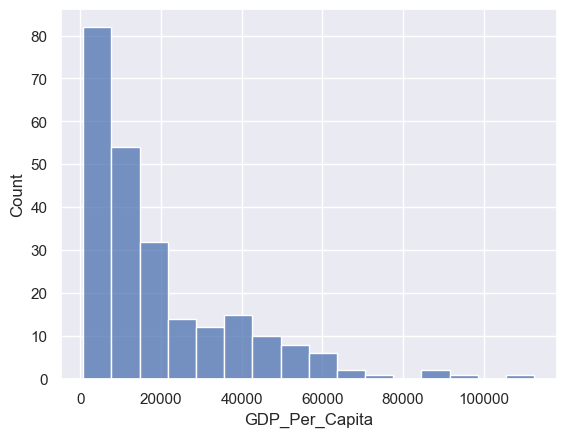

In [14]:
#seaborn histogram
sns.set(style="darkgrid")
sns.histplot(data=gdp_2020, x="GDP_Per_Capita")
plt.show()

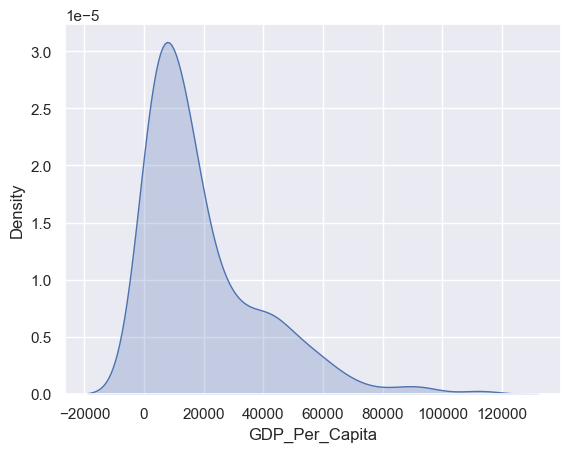

In [15]:
# density plot 
sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill=True)
plt.show()



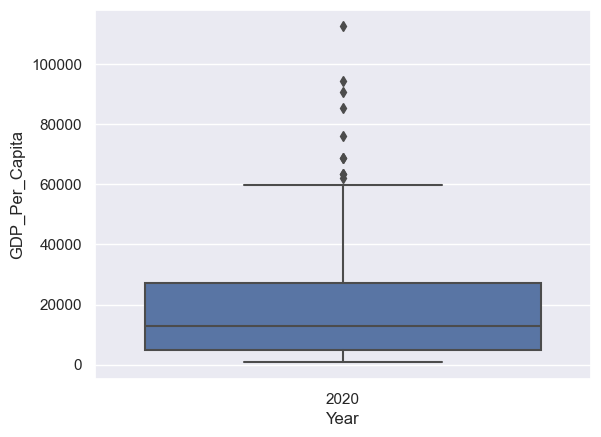

In [9]:
#box plot
sns.boxplot(x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"])
plt.show()


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

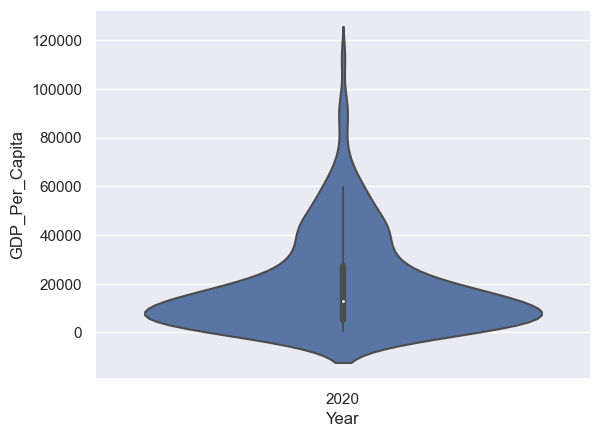

In [10]:
# plot
sns.violinplot(x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"])

9. What was the median GDP per capita value in 2020?

In [11]:
tt = gdp_df[gdp_df["Year"]==2020]

tt["GDP_Per_Capita"].median()

12908.9374056206

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2020     1970.560169
10                    Afghanistan  2010     1957.029070
19    Africa Eastern and Southern  2020     3491.978104
29    Africa Eastern and Southern  2010     3545.205203
39    Africa Eastern and Southern  2000     2915.472987
...                           ...   ...             ...
7144                       Zambia  1990     2190.181724
7145                     Zimbabwe  2020     2134.555461
7155                     Zimbabwe  2010     1813.531764
7165                     Zimbabwe  2000     2771.060576
7175                     Zimbabwe  1990     2652.129209

[918 rows x 3 columns]


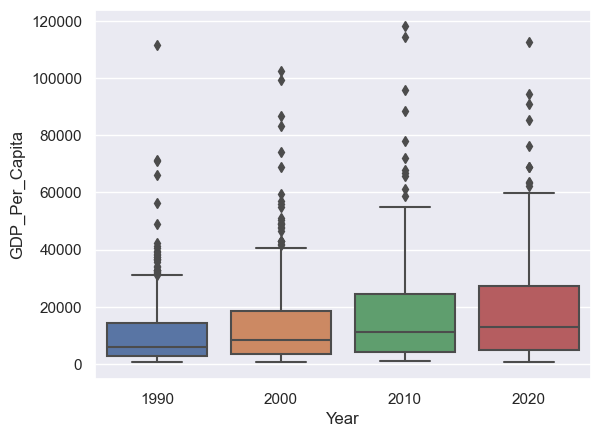

In [12]:
gdp_decades = gdp_df["Year"].isin([1990, 2000, 2010, 2020])
sub = gdp_df[gdp_decades]
print(sub)

#box plot
sns.boxplot(x=sub["Year"], y=sub["GDP_Per_Capita"])
plt.show()


11. Which country was the first to have a GDP per capita greater than $100,000?

In [13]:
filtered_values = np.where((gdp_df['GDP_Per_Capita']>=100000) & (gdp_df['Year'] == 1990))
print(filtered_values)
display(gdp_df.loc[filtered_values])

(array([6838], dtype=int64),)


,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

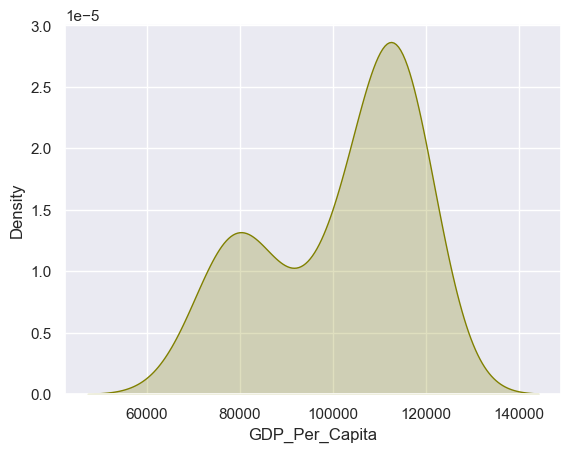

In [14]:
gdp_df.sort_values(["Year", "GDP_Per_Capita"], ascending=[False, False])

table = gdp_df[gdp_df["Country"]=="Luxembourg"]

sns.set(style="darkgrid")
 
# density plot with shaded area with kdeplot 'shade' parameter
sns.kdeplot(table['GDP_Per_Capita'], fill=True, bw_method=0.5, color="olive")
plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

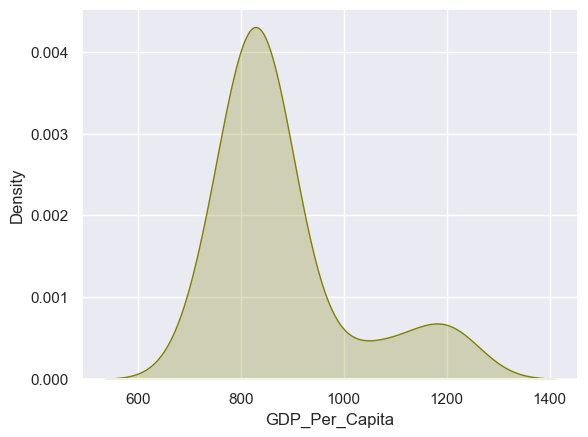

In [15]:
gdp_df.sort_values(["Year", "GDP_Per_Capita"], ascending=[False, True])
table = gdp_df[gdp_df["Country"]=="Burundi"]

sns.set(style="darkgrid")
 
# density plot with shaded area with kdeplot 'shade' parameter
sns.kdeplot(table['GDP_Per_Capita'], fill=True, bw_method=0.5, color="olive")
plt.show()


 **Bonus question:** Is it true in general that countries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [16]:
# mean gdp in 2020
maxyear = gdp_df[gdp_df["Year"]==2020]
xmean = maxyear["GDP_Per_Capita"].mean()
xmean

# mean gdp in 1990
minyear = gdp_df[gdp_df["Year"]==1990]
ymean = minyear["GDP_Per_Capita"].mean()
ymean
print(ymean, ",", xmean)

# it's true that countries have a higher mean gdp in 2020 than 1990

# Which countries had lower GDP per capita in 2020 than in 1990?
maxyear = gdp_df[gdp_df["Year"]==2020]
sorted1 = maxyear.sort_values("GDP_Per_Capita")
sorted1



minyear = gdp_df[gdp_df["Year"]==1990]
sorted2 = minyear.sort_values("GDP_Per_Capita")
sorted2




12465.941627925598 , 19496.88171245749


,Country,Year,GDP_Per_Capita
4546,Mozambique,1990,471.325103
4577,Myanmar,1990,564.227113
1991,Ethiopia,1990,767.013565
6776,Uganda,1990,913.726756
5494,Rwanda,1990,936.634310
...,...,...,...
6343,Switzerland,1990,56329.215654
669,Bermuda,1990,65961.406278
3912,Luxembourg,1990,70860.819124
851,Brunei,1990,71232.789430


14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [17]:
internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines = 'skip')
print(internet_df.head())
print(internet_df.tail())

internet_df.info()

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
     Country or Area                                               Year  \
4670             175             Includes individuals 3 years and older   
4671             176                                   NTIA/CPS survey.   
4672             178  Estimated based on Survey's results. Populatio...   
4673             179                     Preliminary. Country estimate.   
4674             180  The methodology used to estimated the figure f...   

      Value  Value Footnotes  
4670    NaN              NaN  
4671    NaN              NaN  
4672    NaN              NaN  
4673    NaN              NaN  
4674    NaN              NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 en

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [18]:
internet_df = internet_df.drop(['Value Footnotes'], axis=1)
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})
print(internet_df.head())

       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000


16. Look at the number of observations in this dataset per year. What do you notice?

In [20]:
internet_df.groupby("Year")["Country"].count().sort_index()


Year
\r\nMultipliers were applied to residential and commercial suscriptions, taking into account the average size of households and employees per business.    1
 \r\nIndividuals aged 15 years and over                                                                                                                    1
 Permanent residents at the age of 6 or above. In the last 6 months.                                                                                       1
 Population age 16-74 using in the last 3 months.                                                                                                          1
 Population age 5+.                                                                                                                                        1
                                                                                                                                                          ..
Using at least one other Internet application besides